<a href="https://colab.research.google.com/github/Officialwax/Officialwax/blob/main/eye_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import files
import pandas as pd
uploaded = files.upload()


for filename in uploaded.keys():
    print(f"Uploaded file: {filename}")
    df = pd.read_csv(filename)

df.head()


Saving eye_cancer_patients.csv to eye_cancer_patients (3).csv
Uploaded file: eye_cancer_patients (3).csv
DataFrame loaded successfully!


,Patient_ID,Age,Gender,Cancer_Type,Laterality,Date_of_Diagnosis,Stage_at_Diagnosis,Treatment_Type,Surgery_Status,Radiation_Therapy,Chemotherapy,Outcome_Status,Survival_Time_Months,Genetic_Markers,Family_History,Country
0,PID00001,58,F,Retinoblastoma,Left,2019-01-25,Stage IV,Radiation,False,15,3,Deceased,85,NaN,True,UK
1,PID00002,15,Other,Retinoblastoma,Right,2021-10-21,Stage III,Chemotherapy,True,69,6,In Remission,10,NaN,True,Japan
2,PID00003,64,M,Retinoblastoma,Bilateral,2021-03-12,Stage IV,Surgery,False,47,6,In Remission,3,BRAF Mutation,False,UK
3,PID00004,33,M,Melanoma,Right,2021-05-10,Stage II,Radiation,True,36,6,Active,40,NaN,False,Canada
4,PID00005,8,Other,Lymphoma,Left,2019-11-24,Stage I,Chemotherapy,False,14,14,In Remission,26,BRAF Mutation,True,USA


In [ ]:
# !pip install catboost
# !pip install pytorch_tabnet
# !pip install sksurv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.7 MB/s eta 0:00:00


In [ ]:
df.head()

df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Patient_ID            5000 non-null   object
 1   Age                   5000 non-null   int64 
 2   Gender                5000 non-null   object
 3   Cancer_Type           5000 non-null   object
 4   Laterality            5000 non-null   object
 5   Date_of_Diagnosis     5000 non-null   object
 6   Stage_at_Diagnosis    5000 non-null   object
 7   Treatment_Type        5000 non-null   object
 8   Surgery_Status        5000 non-null   bool  
 9   Radiation_Therapy     5000 non-null   int64 
 10  Chemotherapy          5000 non-null   int64 
 11  Outcome_Status        5000 non-null   object
 12  Survival_Time_Months  5000 non-null   int64 
 13  Genetic_Markers       2503 non-null   object
 14  Family_History        5000 non-null   bool  
 15  Country               5000 non-null   

,Age,Radiation_Therapy,Chemotherapy,Survival_Time_Months
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.008000,35.447600,10.057400,60.716000
std,25.934387,20.565754,6.030968,34.549774
min,1.000000,0.000000,0.000000,1.000000
25%,22.000000,18.000000,5.000000,31.000000
50%,44.000000,35.000000,10.000000,60.000000
75%,67.000000,53.000000,15.000000,90.000000
max,90.000000,70.000000,20.000000,120.000000


In [ ]:
df.isnull().sum()

,0
Patient_ID,0
Age,0
Gender,0
Cancer_Type,0
Laterality,0
Date_of_Diagnosis,0
Stage_at_Diagnosis,0
Treatment_Type,0
Surgery_Status,0
Radiation_Therapy,0


In [ ]:
categorical_cols = ['Gender', 'Cancer_Type', 'Laterality', 'Stage_at_Diagnosis',
                    'Treatment_Type', 'Outcome_Status', 'Genetic_Markers', 'Family_History', 'Country']

for col in categorical_cols:
    print(f"--- {col} ---")
    print(df[col].value_counts())
    print("\n")


--- Gender ---
Gender
Other    1720
M        1652
F        1628
Name: count, dtype: int64


--- Cancer_Type ---
Cancer_Type
Melanoma          1691
Retinoblastoma    1672
Lymphoma          1637
Name: count, dtype: int64


--- Laterality ---
Laterality
Bilateral    1695
Left         1686
Right        1619
Name: count, dtype: int64


--- Stage_at_Diagnosis ---
Stage_at_Diagnosis
Stage II     1287
Stage III    1281
Stage IV     1242
Stage I      1190
Name: count, dtype: int64


--- Treatment_Type ---
Treatment_Type
Surgery         1679
Chemotherapy    1665
Radiation       1656
Name: count, dtype: int64


--- Outcome_Status ---
Outcome_Status
Deceased        1710
In Remission    1675
Active          1615
Name: count, dtype: int64


--- Genetic_Markers ---
Genetic_Markers
BRAF Mutation    2503
Name: count, dtype: int64


--- Family_History ---
Family_History
False    2538
True     2462
Name: count, dtype: int64


--- Country ---
Country
South Africa    544
Australia       513
France         


Early stopping occurred at epoch 15 with best_epoch = 5 and best_val_0_accuracy = 0.345
Stacked Classification Accuracy: 0.989
              precision    recall  f1-score   support

Chemotherapy       0.99      0.99      0.99       333
   Radiation       0.99      0.99      0.99       331
     Surgery       0.98      0.99      0.99       336

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



,Predicted_Treatment,Treatment_Confidence,Predicted_Survival_Months,Survival_Uncertainty
0,Surgery,0.922359,127.303907,29.879576
1,Chemotherapy,0.984974,133.261143,35.761101
2,Surgery,0.482098,129.668366,33.445964
3,Chemotherapy,0.800755,126.252731,29.664778
4,Radiation,0.850685,132.818987,31.761286


ExactExplainer explainer: 1001it [02:57,  5.37it/s]


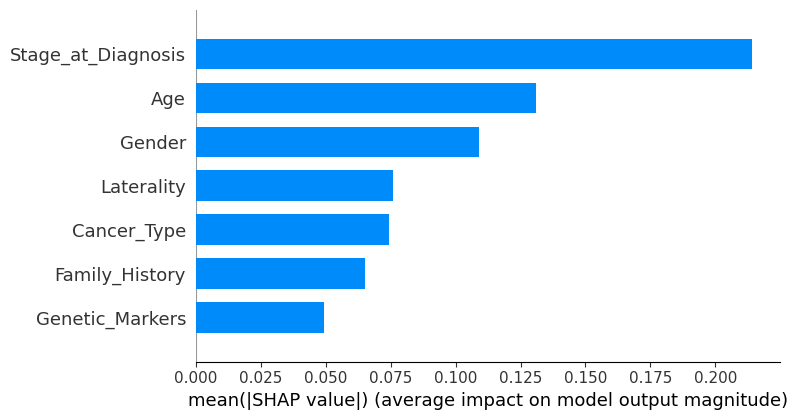

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier
from pytorch_tabnet.tab_model import TabNetClassifier
from xgboost import XGBClassifier
from sksurv.ensemble import RandomSurvivalForest
from sksurv.util import Surv
import shap
import warnings
warnings.filterwarnings("ignore")

df_proc = df.drop(columns=[
    'Patient_ID', 'Date_of_Diagnosis', 'Surgery_Status',
    'Radiation_Therapy', 'Chemotherapy', 'Outcome_Status',
    'Survival_Time_Months', 'Country'
]).copy()

df_proc['Gender'] = df_proc['Gender'].map({'M': 0, 'F': 1, 'Other': 2})
df_proc['Cancer_Type'] = df_proc['Cancer_Type'].astype('category').cat.codes
df_proc['Laterality'] = df_proc['Laterality'].map({'Left': 0, 'Right': 1, 'Bilateral': 2})
df_proc['Stage_at_Diagnosis'] = df_proc['Stage_at_Diagnosis'].map({
    'Stage I': 1, 'Stage II': 2, 'Stage III': 3, 'Stage IV': 4
})
df_proc['Genetic_Markers'] = df_proc['Genetic_Markers'].fillna('None').map({'None':0,'BRAF Mutation':1})
df_proc['Family_History'] = df_proc['Family_History'].astype(int)

le_treatment = LabelEncoder()
df_proc['Treatment_Label'] = le_treatment.fit_transform(df_proc['Treatment_Type'])
X_cls = df_proc.drop(columns=['Treatment_Type', 'Treatment_Label'])
y_cls = df_proc['Treatment_Label']


X_train, X_test, y_train, y_test = train_test_split(
    X_cls, y_cls, stratify=y_cls, test_size=0.2, random_state=42
)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

tabnet_clf = TabNetClassifier(seed=42, verbose=0)
tabnet_clf.fit(
    X_train_res.values, y_train_res.values,
    eval_set=[(X_test.values, y_test.values)],
    patience=10,
    max_epochs=100
)

cat_clf = CatBoostClassifier(verbose=0, random_state=42)
cat_clf.fit(X_train_res, y_train_res)


# Create Meta Features & Train Meta Model
tabnet_probs = tabnet_clf.predict_proba(X_test.values)
catboost_probs = cat_clf.predict_proba(X_test)
meta_X = np.hstack((tabnet_probs, catboost_probs))

num_classes = len(np.unique(y_cls))
meta_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    objective='multi:softprob',
    num_class=num_classes,
    random_state=42
)
meta_model.fit(meta_X, y_test)

final_preds = meta_model.predict(meta_X)
final_probs = meta_model.predict_proba(meta_X)
confidence_scores = np.max(final_probs, axis=1)
final_preds_labels = le_treatment.inverse_transform(final_preds)

print("Stacked Classification Accuracy:", accuracy_score(y_test, final_preds))
print(classification_report(y_test, final_preds, target_names=le_treatment.classes_))


# Survival Prediction
y_surv = df['Survival_Time_Months']
X_surv = X_cls

X_train_surv, X_test_surv, y_train_surv, y_test_surv = train_test_split(
    X_surv, y_surv, test_size=0.2, random_state=42
)

y_train_struct = Surv.from_arrays(event=np.ones_like(y_train_surv, dtype=bool),
                                   time=y_train_surv)

rsf = RandomSurvivalForest(
    n_estimators=200,
    min_samples_split=10,
    min_samples_leaf=15,
    max_features="sqrt",
    n_jobs=-1,
    random_state=42
)
rsf.fit(X_train_surv, y_train_struct)

y_pred_surv = rsf.predict(X_test_surv)
all_tree_preds = np.array([tree.predict(X_test_surv) for tree in rsf.estimators_])
pred_std = np.std(all_tree_preds, axis=0)


# Personalized Prognosis Table

personalized_results = pd.DataFrame({
    "Predicted_Treatment": final_preds_labels,
    "Treatment_Confidence": confidence_scores,
    "Predicted_Survival_Months": y_pred_surv,
    "Survival_Uncertainty": pred_std
})

display(personalized_results.head())


# SHAP Explainability
X_test_np = X_test.values
explainer_tabnet = shap.Explainer(tabnet_clf.predict, X_test_np)
shap_values_tabnet = explainer_tabnet(X_test_np)

shap.summary_plot(
    shap_values_tabnet,
    features=X_test_np,
    feature_names=X_test.columns.tolist(),
    plot_type="bar",
    show=True
)
